# 필요 라이브러리 불러오기

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
## 분석을 할 데이터를 불러와 봅시다.
data = pd.read_csv('./data/boston.csv')

In [6]:
# 데이터를 확인할 때에는 상위 5개의 row를 추출하여 보여주는 head함수를 사용합시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 설명

- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

# Feature Selection

`상관계수`와 `공분산`을 바탕으로 피처를 선택하여 봅시다.

## 가설1 - 범죄율이 높은 곳의 집 값은 낮을까?

일반적인 상식으로는 범죄율이 높다면, 집 값은 낮아야하는게 사실입니다. 하지만 데이터를 살펴보았을 때 일반적인 상식과 다른 경우가 나오는 데이터가 있을 수 있으므로 꼭 실제 데이터로 그래프를 그려본 뒤 가설을 확인해보는것이 중요합니다.

In [7]:
# 먼저, 상관계수와 공분산은 연속형자료를 분석하기 때문에 범주형변수를 제거합니다.
del data['chas']
del data['rad']

In [8]:
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


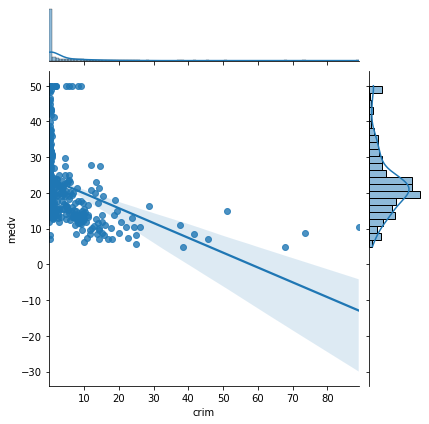

In [10]:
# 실제 집 값과 범죄율의 상관관계가 있는지 그래프를 통해 살펴봅시다.

sns.jointplot(data= data, x='crim', y='medv', kind='reg')

#### `x.cov(y)`

- 공분산을 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [11]:
data.cov()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
crim,73.986578,-40.215956,23.992339,0.419594,-1.325038,85.405322,-6.876722,844.821538,5.399331,-302.381816,27.986168,-30.718508
zn,-40.215956,543.936814,-85.412648,-1.396148,5.112513,-373.901548,32.629304,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
indus,23.992339,-85.412648,47.064442,0.607074,-1.887957,124.513903,-10.228097,833.360290,5.692104,-223.579756,29.580270,-30.520823
nox,0.419594,-1.396148,0.607074,0.013428,-0.024603,2.385927,-0.187696,13.046286,0.047397,-4.020570,0.488946,-0.455412
rm,-1.325038,5.112513,-1.887957,-0.024603,0.493671,-4.751929,0.303663,-34.583448,-0.540763,8.215006,-3.079741,4.493446
age,85.405322,-373.901548,124.513903,2.385927,-4.751929,792.358399,-44.329379,2402.690122,15.936921,-702.940328,121.077725,-97.589017
dis,-6.876722,32.629304,-10.228097,-0.187696,0.303663,-44.329379,4.434015,-189.664592,-1.059775,56.040356,-7.473329,4.840229
tax,844.821538,-1236.453735,833.360290,13.046286,-34.583448,2402.690122,-189.664592,28404.759488,168.153141,-6797.911215,654.714520,-726.255716
ptratio,5.399331,-19.776571,5.692104,0.047397,-0.540763,15.936921,-1.059775,168.153141,4.686989,-35.059527,5.782729,-10.110657
b,-302.381816,373.721402,-223.579756,-4.020570,8.215006,-702.940328,56.040356,-6797.911215,-35.059527,8334.752263,-238.667516,279.989834


In [12]:
# 실제 범죄율과 집 값의 공분산을 확인해봅시다.
data['crim'].cov(data['medv'])

# 서로 음의 방향이구나 
# 상관성을 확인하려면 상관계수를 확인해야 한다.

-30.71850796445817

#### `x.corr(y)`

- 상관계수를 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 상관계수을 계산하여 줍니다.

In [13]:
data.corr()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
b,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


In [15]:
# 실제 상관계수가 몇인지도 확인해봅시다.
data['crim'].corr(data['medv'])

# 0.3~0.6 사이에 있기 때문에 상관성이 있다고 판단할 수 있다.
# crim 컬럼은 피처로 셀랙하겠다.

-0.3883046085868113

## 가설2 - 방의 개수가 많은 곳이 집 값이 비쌀까?

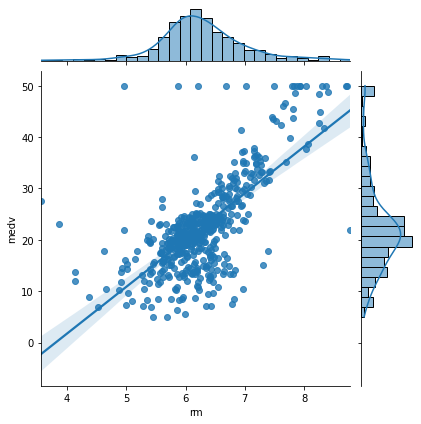

In [16]:
# 방의 개수가 늘어날수록 집 값도 늘어나지 않을까?
sns.jointplot(data=data, x= 'rm',  y='medv', kind='reg')

In [17]:
# 실제 상관계수가 몇인지도 확인해봅시다.
data['rm'].corr(data['medv'])
# 상관관계가 있어 보인다.

0.6953599470715395

In [18]:
# 위와 같이 공분산도 확인해봅시다.
data['rm'].cov(data['medv'])

4.493445879544477

## 가설3 - ptratio: 학생/교사 비율이 크면 집값도 비쌀까?

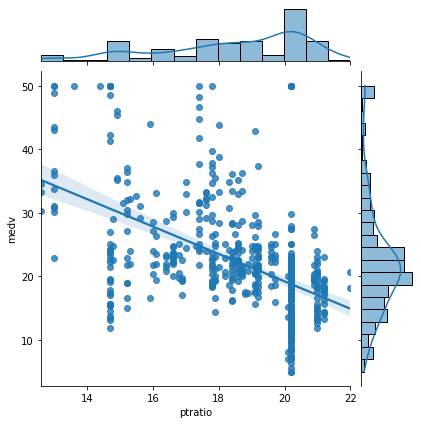

In [20]:
sns.jointplot(data=data, x= 'ptratio', y='medv', kind='reg')

In [21]:
data['ptratio'].corr(data['medv'])

-0.5077866855375617

In [19]:
# heatmap으로 확인해 볼 수도 있지만
# 피처 하나하나 가설을 세워서 그래프로 그려보는 연습을 하는 것이 좋음

#### `sns.heatmap(df, cmap, annot, fmt)`

- 앞에서 배운 heatmap의 심화
- cmap - 전체적인 색을 지정 (summer /  YlGnBu / RdYlGn_r 등)
- annot - True / False 로써 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소숫점 자리수 설정

<AxesSubplot:>

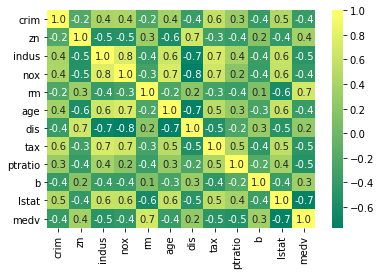

In [24]:
sns.heatmap(data=data.corr(), cmap='summer', annot=True, fmt='0.1f')

#### `plt.figure(figsize = (가로, 세로))`

- 도화지의 크기 설정

<AxesSubplot:>

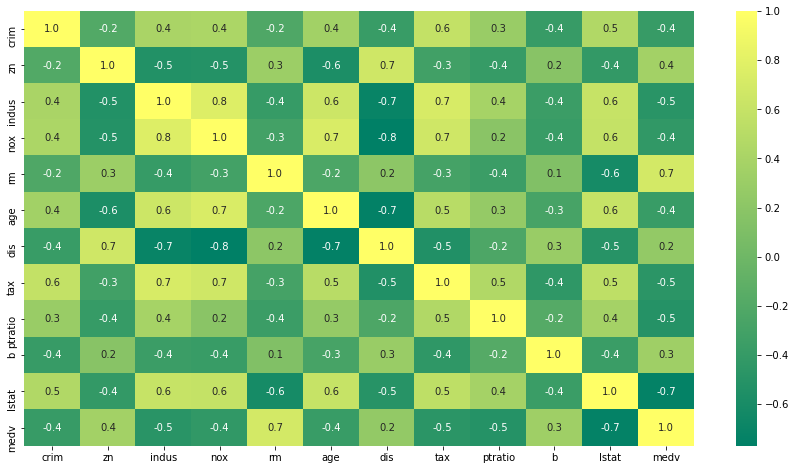

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(), cmap='summer', annot=True, fmt='0.1f')

# Feature Extraction

`PCA`를 이용하여 새로운 변수를 만들어보자.
* 상관성이 작은 피처들을 PCA를 통해 합쳐서 상관성 높은 피쳐를 만들 수 있다.

In [34]:
# 변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일 것 인지 확인해봅시다.

corr_bar=[]

for column in data.columns:
    print(f'{column}과 집값의 상관관계 :', data[column].corr(data['medv']))
    corr_bar.append(abs(data[column].corr(data['medv']))) # 비교를 위해 절대값을 씌워 준다,

crim과 집값의 상관관계 : -0.3883046085868113
zn과 집값의 상관관계 : 0.36044534245054277
indus과 집값의 상관관계 : -0.4837251600283727
nox과 집값의 상관관계 : -0.4273207723732826
rm과 집값의 상관관계 : 0.6953599470715395
age과 집값의 상관관계 : -0.3769545650045963
dis과 집값의 상관관계 : 0.24992873408590388
tax과 집값의 상관관계 : -0.468535933567767
ptratio과 집값의 상관관계 : -0.5077866855375617
b과 집값의 상관관계 : 0.33346081965706653
lstat과 집값의 상관관계 : -0.7376627261740147
medv과 집값의 상관관계 : 1.0


In [35]:
corr_bar

[0.3883046085868113,
 0.36044534245054277,
 0.4837251600283727,
 0.4273207723732826,
 0.6953599470715395,
 0.3769545650045963,
 0.24992873408590388,
 0.468535933567767,
 0.5077866855375617,
 0.33346081965706653,
 0.7376627261740147,
 1.0]

C:\ProgramData\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

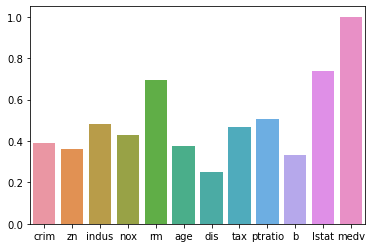

In [36]:
# 앞서 배운 barplot을 통하여 그래프를 그려봅시다.
sns.barplot(data.columns, corr_bar)

In [37]:
# 수치형데이터 중에 비교적 상관계수가 낮은 두개의 변수를 선택해봅시다.
# -> dis, b 컬럼이 가장 낮은데 이 두 컬럼을 PCA를 통해 합쳐서 상관성 높은 피처를 만들어 보자
x= data[['dis', 'b']]

In [38]:
# PCA를 위한 라이브러리를 불러옵니다.
from sklearn.decomposition import PCA

#### `PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다.
- 객체를 생성하는 개념

#### `PCA.fit(x)`

- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

#### `PCA.components_`

- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도

#### `PCA.explained_variance_ratio_`

- 새로운 변수가 설명하는 분산의 비율

#### `PCA.transform`

- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [39]:
# 2개의 변수를 조합하여 1개의 변수를 만들어봅시다.

pca = PCA(n_components=1)

In [40]:
# 데이터를 학습시킵니다.
pca.fit(x)

PCA(n_components=1)

In [42]:
x.head(3)

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83


In [41]:
# 새로운 변수에 담긴 각 변수의 분산을 확인할 수 있습니다.
# pca.components_ : 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도
pca.components_

# 의미 : 컬럼 b의 비율을 많이 담았다.(99%) -> why? -> 정규화 실습때 설명하겠다.

array([[-0.00672682, -0.99997737]])

In [43]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.9995135])

In [44]:
# 새로운 변수를 pc1이라는 컬럼에 추가합시다.

data['pc1'] = pca.transform(x)

In [46]:
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-40.240309


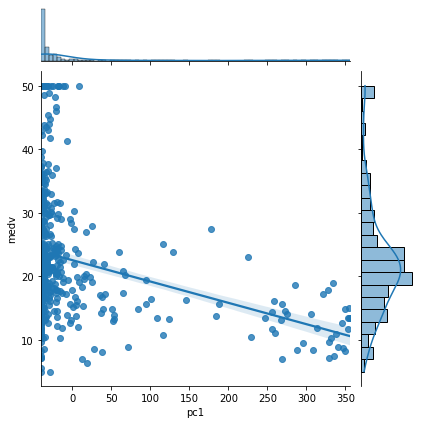

In [48]:
# 새로운 변수와 집 값의 상관관계를 확인해봅시다.

sns.jointplot(data=data, x='pc1', y='medv', kind= 'reg')

In [49]:
# 상관계수도 확인해봅시다.
data['pc1'].corr(data['medv'])

# 합치기 전과 거의 같음 -> 아까 컬럼 b 의 비율을 많이 담았기 때문이다.
# 정규화 해보자.

-0.33348451067418966

# 정규화
`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아봅시다.

#### `StandardScaler()`

- 정규화 객체 생성

#### `scaler.fit(x)`

- 정규화 객체로 학습

#### `scaler.transform(x)`

- 학습된 학습기로 변수 x의 데이터를 변환

In [50]:
# 정규화에 필요한 라이브러리 입니다.
from sklearn.preprocessing import StandardScaler

In [51]:
# 정규화 객체를 만들어 줍니다.
scaler = StandardScaler()

In [52]:
# x를 학습시킨 후 변형하여 정규환된 x로 만들어 봅니다.

scaler.fit(x)
scaler_x = scaler.transform(x)

# scaler_x = scaler.fit_tranform(x)

In [53]:
scaler_x

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

### 반복 작업

In [54]:
# PCA의 개수를 찾기
pca = PCA(n_components=1)
# 데이터를 학습
pca.fit(scaler_x)
# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인할 수 있습니다.
pca.components_

# 아까와는 다르게 비슷한 비율로 담긴것을 확인할 수 있다.

array([[-0.70710678, -0.70710678]])

In [55]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.64575584])

In [56]:
# 위와 같이 pc2의 컬럼에 데이터를 넣어봅시다.
data['pc2'] = pca.transform(scaler_x)

In [57]:
data.head(3)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv,pc1,pc2
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-40.227042,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-40.232942,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-36.163035,-0.674288


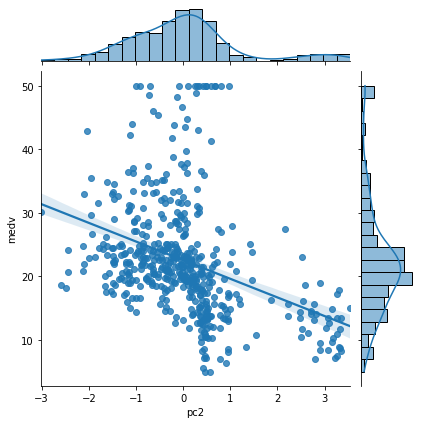

In [59]:
sns.jointplot(data= data, x='pc2', y='medv', kind='reg' )

In [60]:
data['pc2'].corr(data['medv'])

# 아까보다는 상관관계가 커짐

-0.3629898510009019